# Machine Learning with PyCaret

Hi Guys, Welcome to [Tirendaz Academy](https://youtube.com/c/tirendazacademy) 😀 
</br>
In this notebook,  I'm goint to talk about PyCaret library.
In short, the notebooks covers the following topics:
- Data preprocessing
- Buiding the model
- Model selection
- Model tuning
- Model evaluation
- Model finalisation

## Loading the Data

In [84]:
import pandas as pd

In [85]:
df = pd.read_csv("heart.csv")

In [86]:
df.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1


In [87]:
df.shape

(200, 16)

## Data Preprocessing

In [88]:
data = df.sample(frac = 0.95, random_state=0)

In [89]:
data.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
18,47,2,130,80,67,147,334,1,8,3,138,85,303,147,2,0
170,64,4,104,74,63,146,300,3,8,1,130,80,249,143,0,0
107,45,3,130,100,72,168,252,5,3,1,150,100,234,176,0,0
98,49,4,120,80,63,142,283,3,8,5,116,88,311,160,0,1
177,22,4,120,90,69,192,240,5,8,1,150,105,269,201,0,0


In [90]:
data_unseen = df.drop(data.index)

In [91]:
data.reset_index(inplace=True, drop = True)

In [92]:
data.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,47,2,130,80,67,147,334,1,8,3,138,85,303,147,2,0
1,64,4,104,74,63,146,300,3,8,1,130,80,249,143,0,0
2,45,3,130,100,72,168,252,5,3,1,150,100,234,176,0,0
3,49,4,120,80,63,142,283,3,8,5,116,88,311,160,0,1
4,22,4,120,90,69,192,240,5,8,1,150,105,269,201,0,0


In [93]:
data_unseen.reset_index(inplace=True, drop = True)

In [94]:
data["DEATH"].value_counts()

0    131
1     59
Name: DEATH, dtype: int64

In [95]:
#!pip install --user pycaret

In [96]:
from pycaret.classification import * 

In [97]:
from imblearn.over_sampling import RandomOverSampler

In [98]:
model = setup(data=data,
             target = "DEATH",
             normalize = True,
             normalize_method="minmax",
             train_size = 0.8,
             fix_imbalance= True,
             fix_imbalance_method=RandomOverSampler(),
             session_id = 0)

#Burada data pycareta tanıtılıyor

,Description,Value
0,session_id,0
1,Target,DEATH
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(190, 16)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


data: Union[pd.DataFrame, Callable[[], pd.DataFrame]]
    Shape (n_samples, n_features), where n_samples is the number of samples and
    n_features is the number of features. If ``data`` is a function, then it should
    generate the pandas dataframe. If you want to use distributed PyCaret, it is
    recommended to provide a function to avoid broadcasting large datasets from
    the driver to workers.


target: str
    Name of the target column to be passed in as a string. The target variable can
    be either binary or multiclass.


train_size: float, default = 0.7
    Proportion of the dataset to be used for training and validation. Should be
    between 0.0 and 1.0.


test_data: pandas.DataFrame, default = None
    If not None, test_data is used as a hold-out set and ``train_size`` parameter is
    ignored. test_data must be labelled and the shape of data and test_data must
    match.


preprocess: bool, default = True
    When set to False, no transformations are applied except for train_test_split
    and custom transformations passed in ``custom_pipeline`` param. Data must be
    ready for modeling (no missing values, no dates, categorical data encoding),
    when preprocess is set to False.


imputation_type: str, default = 'simple'
    The type of imputation to use. Can be either 'simple' or 'iterative'.


iterative_imputation_iters: int, default = 5
    Number of iterations. Ignored when ``imputation_type`` is not 'iterative'.


categorical_features: list of str, default = None
    If the inferred data types are not correct or the silent param is set to True,
    categorical_features param can be used to overwrite or define the data types.
    It takes a list of strings with column names that are categorical.


categorical_imputation: str, default = 'constant'
    Missing values in categorical features are imputed with a constant 'not_available'
    value. The other available option is 'mode'.


categorical_iterative_imputer: str, default = 'lightgbm'
    Estimator for iterative imputation of missing values in categorical features.
    Ignored when ``imputation_type`` is not 'iterative'.


ordinal_features: dict, default = None
    Encode categorical features as ordinal. For example, a categorical feature with
    'low', 'medium', 'high' values where low < medium < high can be passed as
    ordinal_features = { 'column_name' : ['low', 'medium', 'high'] }.


high_cardinality_features: list of str, default = None
    When categorical features contains many levels, it can be compressed into fewer
    levels using this parameter. It takes a list of strings with column names that
    are categorical.


high_cardinality_method: str, default = 'frequency'
    Categorical features with high cardinality are replaced with the frequency of
    values in each level occurring in the training dataset. Other available method
    is 'clustering' which trains the K-Means clustering algorithm on the statistical
    attribute of the training data and replaces the original value of feature with the
    cluster label. The number of clusters is determined by optimizing Calinski-Harabasz
    and Silhouette criterion.


numeric_features: list of str, default = None
    If the inferred data types are not correct or the silent param is set to True,
    numeric_features param can be used to overwrite or define the data types.
    It takes a list of strings with column names that are numeric.


numeric_imputation: str, default = 'mean'
    Missing values in numeric features are imputed with 'mean' value of the feature
    in the training dataset. The other available option is 'median' or 'zero'.


numeric_iterative_imputer: str, default = 'lightgbm'
    Estimator for iterative imputation of missing values in numeric features.
    Ignored when ``imputation_type`` is set to 'simple'.


date_features: list of str, default = None
    If the inferred data types are not correct or the silent param is set to True,
    date_features param can be used to overwrite or define the data types. It takes
    a list of strings with column names that are DateTime.


ignore_features: list of str, default = None
    ignore_features param can be used to ignore features during model training.
    It takes a list of strings with column names that are to be ignored.


normalize: bool, default = False
    When set to True, it transforms the numeric features by scaling them to a given
    range. Type of scaling is defined by the ``normalize_method`` parameter.


normalize_method: str, default = 'zscore'
    Defines the method for scaling. By default, normalize method is set to 'zscore'
    The standard zscore is calculated as z = (x - u) / s. Ignored when ``normalize``
    is not True. The other options are:

    - minmax: scales and translates each feature individually such that it is in
      the range of 0 - 1.
    - maxabs: scales and translates each feature individually such that the
      maximal absolute value of each feature will be 1.0. It does not
      shift/center the data, and thus does not destroy any sparsity.
    - robust: scales and translates each feature according to the Interquartile
      range. When the dataset contains outliers, robust scaler often gives
      better results.


transformation: bool, default = False
    When set to True, it applies the power transform to make data more Gaussian-like.
    Type of transformation is defined by the ``transformation_method`` parameter.


transformation_method: str, default = 'yeo-johnson'
    Defines the method for transformation. By default, the transformation method is
    set to 'yeo-johnson'. The other available option for transformation is 'quantile'.
    Ignored when ``transformation`` is not True.


handle_unknown_categorical: bool, default = True
    When set to True, unknown categorical levels in unseen data are replaced by the
    most or least frequent level as learned in the training dataset.


unknown_categorical_method: str, default = 'least_frequent'
    Method used to replace unknown categorical levels in unseen data. Method can be
    set to 'least_frequent' or 'most_frequent'.


pca: bool, default = False
    When set to True, dimensionality reduction is applied to project the data into
    a lower dimensional space using the method defined in ``pca_method`` parameter.


pca_method: str, default = 'linear'
    The 'linear' method performs uses Singular Value  Decomposition. Other options are:

    - kernel: dimensionality reduction through the use of RVF kernel.
    - incremental: replacement for 'linear' pca when the dataset is too large.


pca_components: int or float, default = None
    Number of components to keep. if pca_components is a float, it is treated as a
    target percentage for information retention. When pca_components is an integer
    it is treated as the number of features to be kept. pca_components must be less
    than the original number of features. Ignored when ``pca`` is not True.


ignore_low_variance: bool, default = False
    When set to True, all categorical features with insignificant variances are
    removed from the data. The variance is calculated using the ratio of unique
    values to the number of samples, and the ratio of the most common value to the
    frequency of the second most common value.


combine_rare_levels: bool, default = False
    When set to True, frequency percentile for levels in categorical features below
    a certain threshold is combined into a single level.


rare_level_threshold: float, default = 0.1
    Percentile distribution below which rare categories are combined. Ignored when
    ``combine_rare_levels`` is not True.


bin_numeric_features: list of str, default = None
    To convert numeric features into categorical, bin_numeric_features parameter can
    be used. It takes a list of strings with column names to be discretized. It does
    so by using 'sturges' rule to determine the number of clusters and then apply
    KMeans algorithm. Original values of the feature are then replaced by the
    cluster label.


remove_outliers: bool, default = False
    When set to True, outliers from the training data are removed using the Singular
    Value Decomposition.


outliers_threshold: float, default = 0.05
    The percentage outliers to be removed from the training dataset. Ignored when
    ``remove_outliers`` is not True.


remove_multicollinearity: bool, default = False
    When set to True, features with the inter-correlations higher than the defined
    threshold are removed. When two features are highly correlated with each other,
    the feature that is less correlated with the target variable is removed. Only
    considers numeric features.

multicollinearity_threshold: float, default = 0.9
    Threshold for correlated features. Ignored when ``remove_multicollinearity``
    is not True.


remove_perfect_collinearity: bool, default = True
    When set to True, perfect collinearity (features with correlation = 1) is removed
    from the dataset, when two features are 100% correlated, one of it is randomly
    removed from the dataset.


create_clusters: bool, default = False
    When set to True, an additional feature is created in training dataset where each
    instance is assigned to a cluster. The number of clusters is determined by
    optimizing Calinski-Harabasz and Silhouette criterion.


cluster_iter: int, default = 20
    Number of iterations for creating cluster. Each iteration represents cluster
    size. Ignored when ``create_clusters`` is not True.


polynomial_features: bool, default = False
    When set to True, new features are derived using existing numeric features.


polynomial_degree: int, default = 2
    Degree of polynomial features. For example, if an input sample is two dimensional
    and of the form [a, b], the polynomial features with degree = 2 are:
    [1, a, b, a^2, ab, b^2]. Ignored when ``polynomial_features`` is not True.


trigonometry_features: bool, default = False
    When set to True, new features are derived using existing numeric features.


polynomial_threshold: float, default = 0.1
    When ``polynomial_features`` or ``trigonometry_features`` is True, new features
    are derived from the existing numeric features. This may sometimes result in too
    large feature space. polynomial_threshold parameter can be used to deal with this
    problem. It does so by using combination of Random Forest, AdaBoost and Linear
    correlation. All derived features that falls within the percentile distribution
    are kept and rest of the features are removed.


group_features: list or list of list, default = None
    When the dataset contains features with related characteristics, group_features
    parameter can be used for feature extraction. It takes a list of strings with
    column names that are related.


group_names: list, default = None
    Group names to be used in naming new features. When the length of group_names
    does not match with the length of ``group_features``, new features are named
    sequentially group_1, group_2, etc. It is ignored when ``group_features`` is
    None.


feature_selection: bool, default = False
    When set to True, a subset of features are selected using a combination of
    various permutation importance techniques including Random Forest, Adaboost
    and Linear correlation with target variable. The size of the subset is
    dependent on the ``feature_selection_threshold`` parameter.


feature_selection_threshold: float, default = 0.8
    Threshold value used for feature selection. When ``polynomial_features`` or
    ``feature_interaction`` is True, it is recommended to keep the threshold low
    to avoid large feature spaces. Setting a very low value may be efficient but
    could result in under-fitting.


feature_selection_method: str, default = 'classic'
    Algorithm for feature selection. 'classic' method uses permutation feature
    importance techniques. Other possible value is 'boruta' which uses boruta
    algorithm for feature selection.


feature_interaction: bool, default = False
    When set to True, new features are created by interacting (a * b) all the
    numeric variables in the dataset. This feature is not scalable and may not
    work as expected on datasets with large feature space.


feature_ratio: bool, default = False
    When set to True, new features are created by calculating the ratios (a / b)
    between all numeric variables in the dataset. This feature is not scalable and
    may not work as expected on datasets with large feature space.


interaction_threshold: bool, default = 0.01
    Similar to polynomial_threshold, It is used to compress a sparse matrix of newly
    created features through interaction. Features whose importance based on the
    combination  of  Random Forest, AdaBoost and Linear correlation falls within the
    percentile of the  defined threshold are kept in the dataset. Remaining features
    are dropped before further processing.


fix_imbalance: bool, default = False
    When training dataset has unequal distribution of target class it can be balanced
    using this parameter. When set to True, SMOTE (Synthetic Minority Over-sampling
    Technique) is applied by default to create synthetic datapoints for minority class.


fix_imbalance_method: obj, default = None
    When ``fix_imbalance`` is True, 'imblearn' compatible object with 'fit_resample'
    method can be passed. When set to None, 'imblearn.over_sampling.SMOTE' is used.


data_split_shuffle: bool, default = True
    When set to False, prevents shuffling of rows during 'train_test_split'.


data_split_stratify: bool or list, default = False
    Controls stratification during 'train_test_split'. When set to True, will
    stratify by target column. To stratify on any other columns, pass a list of
    column names. Ignored when ``data_split_shuffle`` is False.


fold_strategy: str or sklearn CV generator object, default = 'stratifiedkfold'
    Choice of cross validation strategy. Possible values are:

    * 'kfold'
    * 'stratifiedkfold'
    * 'groupkfold'
    * 'timeseries'
    * a custom CV generator object compatible with scikit-learn.


fold: int, default = 10
    Number of folds to be used in cross validation. Must be at least 2. This is
    a global setting that can be over-written at function level by using ``fold``
    parameter. Ignored when ``fold_strategy`` is a custom object.


fold_shuffle: bool, default = False
    Controls the shuffle parameter of CV. Only applicable when ``fold_strategy``
    is 'kfold' or 'stratifiedkfold'. Ignored when ``fold_strategy`` is a custom
    object.


fold_groups: str or array-like, with shape (n_samples,), default = None
    Optional group labels when 'GroupKFold' is used for the cross validation.
    It takes an array with shape (n_samples, ) where n_samples is the number
    of rows in the training dataset. When string is passed, it is interpreted
    as the column name in the dataset containing group labels.


n_jobs: int, default = -1
    The number of jobs to run in parallel (for functions that supports parallel
    processing) -1 means using all processors. To run all functions on single
    processor set n_jobs to None.


use_gpu: bool or str, default = False
    When set to True, it will use GPU for training with algorithms that support it,
    and fall back to CPU if they are unavailable. When set to 'force', it will only
    use GPU-enabled algorithms and raise exceptions when they are unavailable. When
    False, all algorithms are trained using CPU only.

    GPU enabled algorithms:

    - Extreme Gradient Boosting, requires no further installation

    - CatBoost Classifier, requires no further installation
      (GPU is only enabled when data > 50,000 rows)

    - Light Gradient Boosting Machine, requires GPU installation
      https://lightgbm.readthedocs.io/en/latest/GPU-Tutorial.html

    - Logistic Regression, Ridge Classifier, Random Forest, K Neighbors Classifier,
      Support Vector Machine, requires cuML >= 0.15
      https://github.com/rapidsai/cuml


custom_pipeline: (str, transformer) or list of (str, transformer), default = None
    When passed, will append the custom transformers in the preprocessing pipeline
    and are applied on each CV fold separately and on the final fit. All the custom
    transformations are applied after 'train_test_split' and before pycaret's internal
    transformations.


html: bool, default = True
    When set to False, prevents runtime display of monitor. This must be set to False
    when the environment does not support IPython. For example, command line terminal,
    Databricks Notebook, Spyder and other similar IDEs.


session_id: int, default = None
    Controls the randomness of experiment. It is equivalent to 'random_state' in
    scikit-learn. When None, a pseudo random number is generated. This can be used
    for later reproducibility of the entire experiment.


log_experiment: bool or str or BaseLogger or list of str or BaseLogger, default = False
    A (list of) PyCaret ``BaseLogger`` or str (one of 'mlflow', 'wandb')
    corresponding to a logger to determine which experiment loggers to use.
    Setting to True will use just MLFlow.


experiment_name: str, default = None
    Name of the experiment for logging. Ignored when ``log_experiment`` is False.

experiment_custom_tags: dict, default = None
    Dictionary of tag_name: String -> value: (String, but will be string-ified
    if not) passed to the mlflow.set_tags to add new custom tags for the experiment.

log_plots: bool or list, default = False
    When set to True, certain plots are logged automatically in the ``MLFlow`` server.
    To change the type of plots to be logged, pass a list containing plot IDs. Refer
    to documentation of ``plot_model``. Ignored when ``log_experiment`` is False.


log_profile: bool, default = False
    When set to True, data profile is logged on the ``MLflow`` server as a html file.
    Ignored when ``log_experiment`` is False.


log_data: bool, default = False
    When set to True, dataset is logged on the ``MLflow`` server as a csv file.
    Ignored when ``log_experiment`` is False.


silent: bool, default = False
    Controls the confirmation input of data types when ``setup`` is executed. When
    executing in completely automated mode or on a remote kernel, this must be True.


verbose: bool, default = True
    When set to False, Information grid is not printed.


profile: bool, default = False
    When set to True, an interactive EDA report is displayed.



## Building the Model

In [99]:
knn = create_model("knn")

#Cross validation ile eğitir

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4375,0.5182,0.6000,0.3000,0.4000,-0.0286,-0.0348
1,0.4375,0.4917,0.5000,0.3333,0.4000,-0.0909,-0.0976
2,0.5333,0.4200,0.2000,0.2500,0.2222,-0.1053,-0.1066
3,0.4000,0.4000,0.0000,0.0000,0.0000,-0.4211,-0.4264
4,0.5333,0.5200,0.4000,0.3333,0.3636,0.0000,0.0000
5,0.6000,0.6600,0.2000,0.3333,0.2500,0.0000,0.0000
6,0.4667,0.5000,0.6000,0.3333,0.4286,0.0000,0.0000
7,0.5333,0.4900,0.6000,0.3750,0.4615,0.0870,0.0945
8,0.6667,0.8400,0.8000,0.5000,0.6154,0.3478,0.3780


In [100]:
tuned_knn = tune_model(knn)

# Parametreleri ayarladı

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8364,0.8000,0.5714,0.6667,0.4754,0.4927
1,0.6875,0.7000,0.3333,0.6667,0.4444,0.2593,0.2894
2,0.8667,0.8800,1.0000,0.7143,0.8333,0.7273,0.7559
3,0.6000,0.4800,0.2000,0.3333,0.2500,0.0000,0.0000
4,0.6000,0.6600,0.4000,0.4000,0.4000,0.1000,0.1000
5,0.4000,0.4800,0.2000,0.1667,0.1818,-0.2857,-0.2887
6,0.8000,0.7200,0.6000,0.7500,0.6667,0.5263,0.5330
7,0.4667,0.4200,0.6000,0.3333,0.4286,0.0000,0.0000
8,0.6667,0.8200,0.8000,0.5000,0.6154,0.3478,0.3780


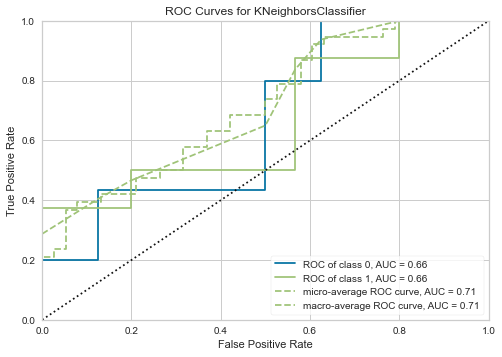

In [101]:
plot_model(tuned_knn, plot = "auc")

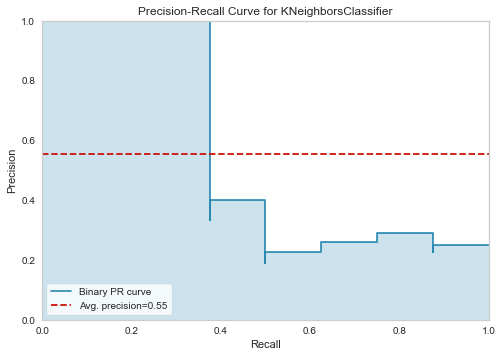

In [102]:
plot_model(tuned_knn, plot="pr")

In [103]:
predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6316,0.6625,0.5000,0.2857,0.3636,0.1307,0.1409


,AGE_50,SBP_50,DBP_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_1,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_9,DEATH,Label,Score
0,0.387755,0.304348,0.701299,0.277778,0.197531,0.414286,0.430769,0.254545,0.311594,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6043
1,0.551020,0.217391,0.545455,0.341270,0.222222,0.535714,0.246154,0.554545,0.376812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6770
2,0.469388,0.217391,0.545455,0.730159,0.419753,0.485714,0.338462,0.254545,0.652174,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5153
3,0.122449,-0.060870,0.285714,0.547619,0.419753,0.300000,0.246154,0.727273,0.710145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5990
4,0.387755,0.600000,0.935065,1.079365,0.222222,0.535714,0.538462,0.500000,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5861
5,0.551020,0.130435,0.415584,0.166667,0.180247,0.392857,0.230769,0.227273,0.137681,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6050
6,0.734694,0.260870,0.480519,0.103175,0.491358,0.500000,0.307692,0.477273,0.159420,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6353
7,0.510204,0.304348,0.675325,0.722222,0.222222,0.428571,0.461538,0.250000,0.434783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5280
8,0.714286,0.260870,0.675325,0.428571,0.259259,0.714286,0.523077,0.486364,0.224638,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5134
9,0.510204,0.217391,0.571429,0.492064,0.271605,0.500000,0.369231,0.409091,0.442029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5784


In [104]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6908,0.6541,0.2967,0.6283,0.3630,0.2064,0.2459,0.1650
ada,Ada Boost Classifier,0.6708,0.6823,0.4367,0.5804,0.4716,0.2439,0.2643,0.0760
svm,SVM - Linear Kernel,0.6696,0.0000,0.5433,0.5217,0.5131,0.2694,0.2807,0.0180
rf,Random Forest Classifier,0.6646,0.7113,0.3167,0.4488,0.3427,0.1628,0.1738,0.1900
dummy,Dummy Classifier,0.6646,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
lr,Logistic Regression,0.6642,0.6932,0.5900,0.5042,0.5329,0.2764,0.2892,0.0260
gbc,Gradient Boosting Classifier,0.6500,0.6928,0.4900,0.5287,0.4687,0.2208,0.2381,0.0740
lightgbm,Light Gradient Boosting Machine,0.6496,0.6769,0.4267,0.4412,0.4281,0.1869,0.1827,0.0340
lda,Linear Discriminant Analysis,0.6371,0.6603,0.5300,0.4700,0.4831,0.2117,0.2236,0.0180
ridge,Ridge Classifier,0.6246,0.0000,0.5500,0.4428,0.4780,0.1956,0.2068,0.0170


In [105]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8091,0.8000,0.5000,0.6154,0.3750,0.4045
1,0.6250,0.6917,0.5000,0.5000,0.5000,0.2000,0.2000
2,0.7333,0.8000,0.6000,0.6000,0.6000,0.4000,0.4000
3,0.4667,0.4600,0.4000,0.2857,0.3333,-0.0909,-0.0945
4,0.5333,0.5600,0.8000,0.4000,0.5333,0.1600,0.2000
5,0.7333,0.7600,0.8000,0.5714,0.6667,0.4545,0.4725
6,0.8000,0.8200,0.4000,1.0000,0.5714,0.4706,0.5547
7,0.8000,0.7800,0.8000,0.6667,0.7273,0.5714,0.5774
8,0.8000,0.6800,0.6000,0.7500,0.6667,0.5263,0.5330


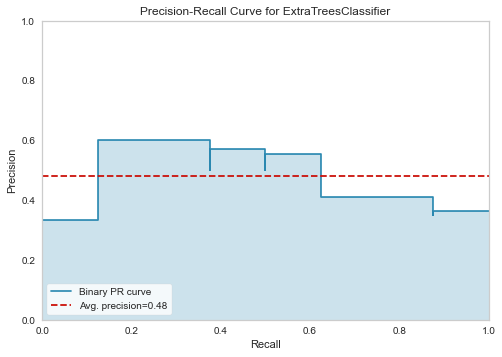

In [106]:
plot_model(tuned_best, plot ="pr")

In [107]:
final_best = finalize_model(tuned_best)

In [108]:
predict_model(final_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7895,0.8750,0.6250,0.5000,0.5556,0.4198,0.4243


,AGE_50,SBP_50,DBP_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_1,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_9,DEATH,Label,Score
0,0.387755,0.304348,0.701299,0.277778,0.197531,0.414286,0.430769,0.254545,0.311594,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5737
1,0.551020,0.217391,0.545455,0.341270,0.222222,0.535714,0.246154,0.554545,0.376812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5340
2,0.469388,0.217391,0.545455,0.730159,0.419753,0.485714,0.338462,0.254545,0.652174,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5668
3,0.122449,-0.060870,0.285714,0.547619,0.419753,0.300000,0.246154,0.727273,0.710145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5668
4,0.387755,0.600000,0.935065,1.079365,0.222222,0.535714,0.538462,0.500000,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5668
5,0.551020,0.130435,0.415584,0.166667,0.180247,0.392857,0.230769,0.227273,0.137681,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5340
6,0.734694,0.260870,0.480519,0.103175,0.491358,0.500000,0.307692,0.477273,0.159420,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5590
7,0.510204,0.304348,0.675325,0.722222,0.222222,0.428571,0.461538,0.250000,0.434783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5427
8,0.714286,0.260870,0.675325,0.428571,0.259259,0.714286,0.523077,0.486364,0.224638,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5492
9,0.510204,0.217391,0.571429,0.492064,0.271605,0.500000,0.369231,0.409091,0.442029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5427


## Model Evaluation

In [109]:
predict_model(final_best, data = data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4000,0.5200,0.4000,0.4000,0.4000,-0.2000,-0.2000


,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,Label,Score
0,40,3,120,80,69,148,185,3,8,3,110,64,241,152,2,1,0,0.5737
1,54,1,141,100,65,171,363,3,7,2,180,100,276,154,2,1,1,0.5492
2,52,4,145,90,66,183,289,3,7,3,150,88,299,143,6,0,1,0.5492
3,34,2,130,90,61,120,317,2,5,2,122,68,248,118,6,0,0,0.5668
4,51,3,138,100,72,208,296,3,7,1,135,95,286,199,8,0,1,0.5343
5,43,1,120,85,70,134,220,3,8,4,140,85,354,141,0,1,0,0.5668
6,25,1,110,80,74,190,235,3,8,2,116,90,280,210,0,1,0,0.5668
7,61,1,150,90,69,142,247,3,6,2,150,90,218,174,0,1,1,0.5723
8,36,3,135,80,69,155,290,3,8,2,120,84,238,157,0,0,0,0.5737
9,49,2,110,75,70,141,150,3,8,4,170,98,221,147,0,0,1,0.5064


Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎